In [1]:
import os
import numpy as np
from mxnet import nd, gluon, init, autograd
from mxnet.gluon import nn
from matplotlib import pyplot as plt


<function matplotlib.pyplot.show(*args, **kw)>

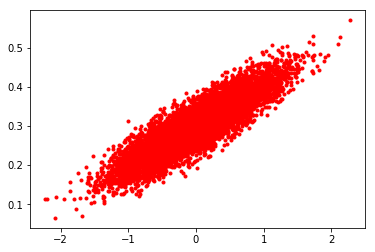

In [2]:
x = np.random.normal(0.0, 0.55, (10000, 1))
y = x * 0.1 + 0.3 + np.random.normal(0.0, 0.03, (10000,1))

plt.plot(x, y, 'r.')
plt.show

In [3]:
net = nn.Sequential()
net.add(nn.Dense(1))

net.initialize(init=init.Xavier())

cross_entropy = gluon.loss.L2Loss()
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.01})

In [4]:
batch_size = 5
tot_iter = len(x) // batch_size
for epoch in range(10):
    train_loss, train_acc, valid_acc = 0., 0., 0.
    #tic = time.time()
    # forward + backward
    for iter in range(tot_iter):
        idx = np.random.choice(len(x), batch_size, replace=False)
        with autograd.record():
            output = net(nd.array(x[idx]))
            loss = cross_entropy(output, nd.array(y[idx]))
        loss.backward()
        # update parameters
        trainer.step(batch_size)
        # calculate training metrics
        train_loss += loss.mean().asscalar()
    #print(loss.mean().asscalar())
    #print(net[0].weight.data(), net[0].bias.data())
    test_y = net.forward(nd.array(x)).asnumpy()
    print("loss : ", train_loss/batch_size)
#     plt.plot(x, y, 'r.')
#     plt.plot(x, test_y, 'b-')
#     plt.show()
#%%

loss :  0.6621629841989488
loss :  0.18133936872400228
loss :  0.1815247735081357
loss :  0.1789156995875601
loss :  0.17807943020488892
loss :  0.17755300822154824
loss :  0.18205173719143203
loss :  0.17771443429210193
loss :  0.18112611251308408
loss :  0.17959895989024516


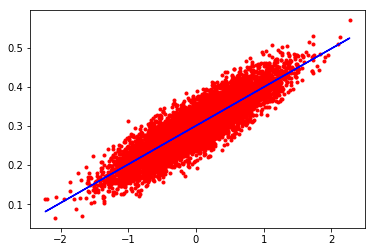

In [5]:
test_y = net.forward(nd.array(x)).asnumpy()
plt.plot(x, y, 'r.')
plt.plot(x, test_y, 'b-')
plt.show()